## Лабораторная работа №6

In [13]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

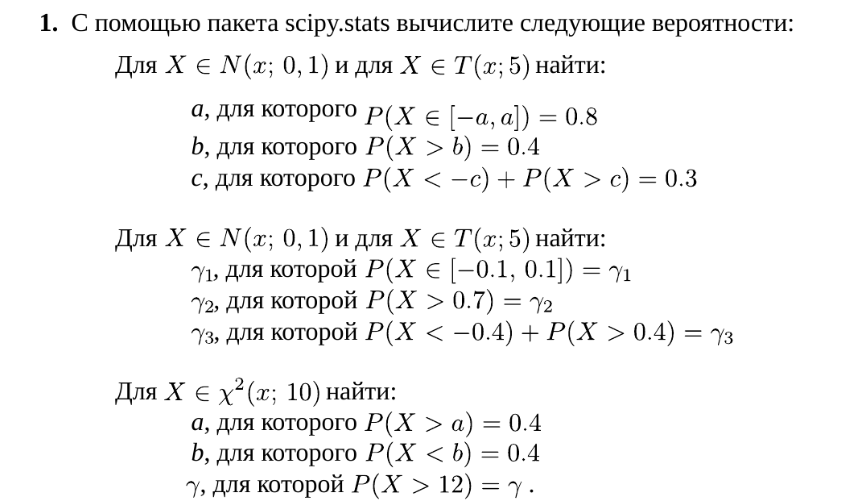

In [14]:
# Параметры распределений (заданы в условии)
mean = 0      # среднее для нормального распределения
std = 1       # стандартное отклонение для нормального распределения
t_df = 5      # степени свободы для t-распределения Стьюдента
chi2_df = 10  # степени свободы для распределения хи-квадрат

# Создание объектов распределений
norm_dist = stats.norm(mean, std)  # Нормальное распределение N(0, 1)
t_dist = stats.t(t_df)             # t-распределение Стьюдента с 5 степенями свободы
chi2_dist = stats.chi2(chi2_df)    # Распределение хи-квадрат с 10 степенями свободы

# -----------------------------------------------------------------
# ЧАСТЬ 1: НАХОЖДЕНИЕ КРИТИЧЕСКИХ ЗНАЧЕНИЙ (a, b, c)
# -----------------------------------------------------------------

# Задача 1a: Найти a, для которого P(X ∈ [-a, a]) = 0.8
# Для симметричного интервала [-a, a] в нормальном распределении:
# P(-a ≤ X ≤ a) = 0.8 означает, что вне интервала остается 0.2 вероятности
# По 0.1 в каждом хвосте (из-за симметрии)
# Поэтому квантиль для 0.9 (0.5 + 0.8/2 = 0.9)

norm_a = norm_dist.ppf(0.9)  # 90%-ный квантиль нормального распределения
t_a = t_dist.ppf(0.9)        # 90%-ный квантиль t-распределения

# Задача 1b: Найти b, для которого P(X > b) = 0.4
# Если P(X > b) = 0.4, то P(X ≤ b) = 1 - 0.4 = 0.6
# Нужен 60%-ный квантиль

norm_b = norm_dist.ppf(0.6)  # 60%-ный квантиль нормального распределения
t_b = t_dist.ppf(0.6)        # 60%-ный квантиль t-распределения

# Задача 1c: Найти c, для которого P(X < -c) + P(X > c) = 0.3
# Это двусторонний критерий: сумма вероятностей в двух хвостах равна 0.3
# Из-за симметрии распределений: P(X > c) = 0.3/2 = 0.15 в каждом хвосте
# Тогда P(X ≤ c) = 1 - 0.15 = 0.85

norm_c = norm_dist.ppf(0.85)  # 85%-ный квантиль нормального распределения
t_c = t_dist.ppf(0.85)        # 85%-ный квантиль t-распределения

# -----------------------------------------------------------------
# ЧАСТЬ 2: НАХОЖДЕНИЕ ВЕРОЯТНОСТЕЙ (γ₁, γ₂, γ₃)
# -----------------------------------------------------------------

# Задача 2 (γ₁): Найти P(X ∈ [-0.1, 0.1])
# P(-0.1 ≤ X ≤ 0.1) = F(0.1) - F(-0.1), где F - функция распределения

norm_g1 = norm_dist.cdf(0.1) - norm_dist.cdf(-0.1)
t_g1 = t_dist.cdf(0.1) - t_dist.cdf(-0.1)

# Задача 2 (γ₂): Найти P(X > 0.7)
# P(X > 0.7) = 1 - P(X ≤ 0.7) = 1 - F(0.7)

norm_g2 = 1 - norm_dist.cdf(0.7)
t_g2 = 1 - t_dist.cdf(0.7)

# Задача 2 (γ₃): Найти P(X < -0.4) + P(X > 0.4)
# Из-за симметрии: = 2 * P(X > 0.4) = 2 * (1 - F(0.4))
# Или: = F(-0.4) + (1 - F(0.4))

norm_g3 = norm_dist.cdf(-0.4) + (1 - norm_dist.cdf(0.4))
t_g3 = t_dist.cdf(-0.4) + (1 - t_dist.cdf(0.4))

# -----------------------------------------------------------------
# ЧАСТЬ 3: РАБОТА С РАСПРЕДЕЛЕНИЕМ ХИ-КВАДРАТ
# -----------------------------------------------------------------

# Задача 3a: Найти a, для которого P(X > a) = 0.4
# Если P(X > a) = 0.4, то P(X ≤ a) = 1 - 0.4 = 0.6
# Нужен 60%-ный квантиль распределения хи-квадрат

chi2_a = chi2_dist.ppf(0.6)

# Задача 3b: Найти b, для которого P(X < b) = 0.4
# Если P(X < b) = 0.4, то нужен 40%-ный квантиль

chi2_b = chi2_dist.ppf(0.4)

# Задача 3 (γ): Найти P(X > 12)
# Правосторонняя вероятность: P(X > 12) = 1 - P(X ≤ 12)

chi2_g = 1 - chi2_dist.cdf(12)

# -----------------------------------------------------------------
# ВЫВОД РЕЗУЛЬТАТОВ
# -----------------------------------------------------------------

print("=" * 60)
print("РЕЗУЛЬТАТЫ ВЫЧИСЛЕНИЙ")
print("=" * 60)

print("\n1. НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ N(0, 1):")
print(f"   a) P(X ∈ [-a, a]) = 0.8  => a = {norm_a:.4f}")
print(f"   b) P(X > b) = 0.4        => b = {norm_b:.4f}")
print(f"   c) P(X < -c)+P(X > c)=0.3 => c = {norm_c:.4f}")

print(f"   γ₁) P(X ∈ [-0.1, 0.1]) = {norm_g1:.4f}")
print(f"   γ₂) P(X > 0.7) = {norm_g2:.4f}")
print(f"   γ₃) P(X < -0.4)+P(X > 0.4) = {norm_g3:.4f}")

print("\n2. t-РАСПРЕДЕЛЕНИЕ СТЬЮДЕНТА T(5):")
print(f"   a) P(X ∈ [-a, a]) = 0.8  => a = {t_a:.4f}")
print(f"   b) P(X > b) = 0.4        => b = {t_b:.4f}")
print(f"   c) P(X < -c)+P(X > c)=0.3 => c = {t_c:.4f}")

print(f"   γ₁) P(X ∈ [-0.1, 0.1]) = {t_g1:.4f}")
print(f"   γ₂) P(X > 0.7) = {t_g2:.4f}")
print(f"   γ₃) P(X < -0.4)+P(X > 0.4) = {t_g3:.4f}")

print("\n3. РАСПРЕДЕЛЕНИЕ ХИ-КВАДРАТ χ²(10):")
print(f"   a) P(X > a) = 0.4  => a = {chi2_a:.4f}")
print(f"   b) P(X < b) = 0.4  => b = {chi2_b:.4f}")
print(f"   γ) P(X > 12) = {chi2_g:.4f}")
print("=" * 60)

# Дополнительная проверка (можно раскомментировать):
# print("\nПРОВЕРКА РЕЗУЛЬТАТОВ:")
# print(f"Для N(0,1): P(-{norm_a:.4f} ≤ X ≤ {norm_a:.4f}) = {norm_dist.cdf(norm_a) - norm_dist.cdf(-norm_a):.4f} (должно быть 0.8)")
# print(f"Для T(5): P(-{t_a:.4f} ≤ X ≤ {t_a:.4f}) = {t_dist.cdf(t_a) - t_dist.cdf(-t_a):.4f} (должно быть 0.8)")

РЕЗУЛЬТАТЫ ВЫЧИСЛЕНИЙ

1. НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ N(0, 1):
   a) P(X ∈ [-a, a]) = 0.8  => a = 1.2816
   b) P(X > b) = 0.4        => b = 0.2533
   c) P(X < -c)+P(X > c)=0.3 => c = 1.0364
   γ₁) P(X ∈ [-0.1, 0.1]) = 0.0797
   γ₂) P(X > 0.7) = 0.2420
   γ₃) P(X < -0.4)+P(X > 0.4) = 0.6892

2. t-РАСПРЕДЕЛЕНИЕ СТЬЮДЕНТА T(5):
   a) P(X ∈ [-a, a]) = 0.8  => a = 1.4759
   b) P(X > b) = 0.4        => b = 0.2672
   c) P(X < -c)+P(X > c)=0.3 => c = 1.1558
   γ₁) P(X ∈ [-0.1, 0.1]) = 0.0758
   γ₂) P(X > 0.7) = 0.2576
   γ₃) P(X < -0.4)+P(X > 0.4) = 0.7057

3. РАСПРЕДЕЛЕНИЕ ХИ-КВАДРАТ χ²(10):
   a) P(X > a) = 0.4  => a = 10.4732
   b) P(X < b) = 0.4  => b = 8.2955
   γ) P(X > 12) = 0.2851


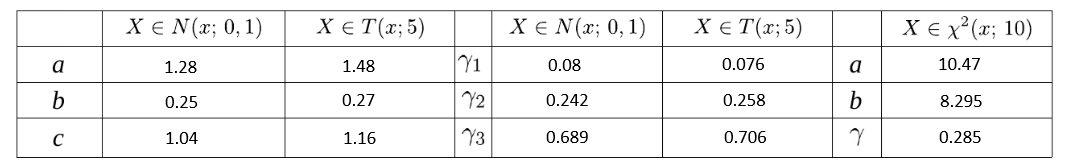

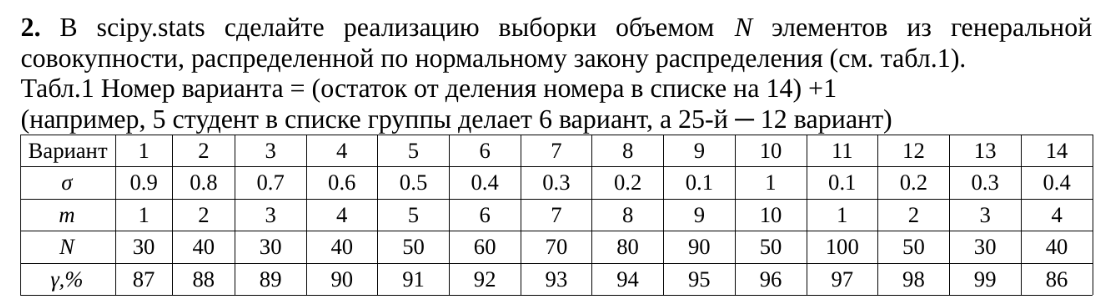

In [15]:
std = 0.1
m = 1
N = 100
g = 0.97

norm_dist = stats.norm(m, std)
norm_values = norm_dist.rvs(size=N)

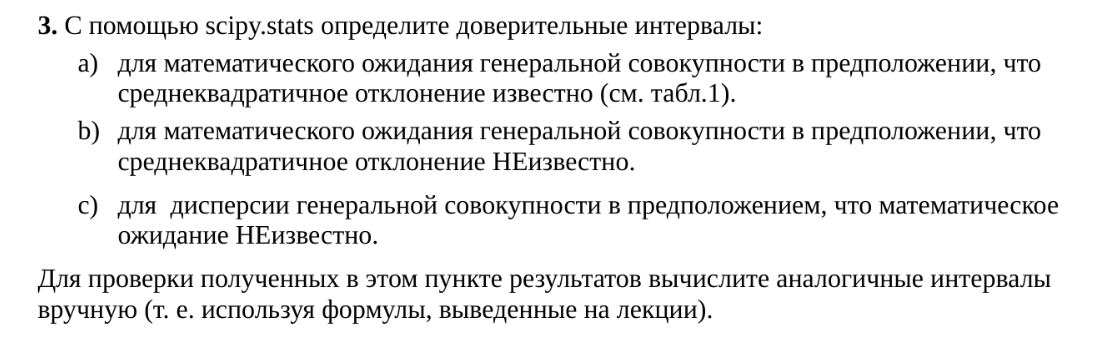

In [16]:
# -----------------------------------------------------------------
# ЧАСТЬ 1: ПРЕДПОЛОЖЕНИЯ И ИСХОДНЫЕ ДАННЫЕ
# -----------------------------------------------------------------
# Предполагаем, что у нас есть:
# norm_values - выборка из нормального распределения размером N
# N - размер выборки
# g - доверительная вероятность (например, 0.95 для 95% доверительного интервала)

# Вычисление выборочных характеристик
norm_mean = norm_values.mean()  # Выборочное среднее (оценка математического ожидания)
norm_var = norm_values.var()    # Выборочная дисперсия (оценка дисперсии)

# -----------------------------------------------------------------
# ЧАСТЬ 2: ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ ДЛЯ МАТЕМАТИЧЕСКОГО ОЖИДАНИЯ 
#          (ИЗВЕСТНАЯ ДИСПЕРСИЯ)
# -----------------------------------------------------------------

# Задача a: Построение доверительного интервала для математического ожидания M
#           при ИЗВЕСТНОЙ дисперсии D = std²
# Формула: X̄ ± Z_{1-α/2} * (σ/√n)
# где:
# X̄ - выборочное среднее
# σ - известное стандартное отклонение генеральной совокупности
# n - объем выборки
# Z_{1-α/2} - квантиль стандартного нормального распределения

# Вычисление полуширины доверительного интервала (точность оценки)
eps = (std / np.sqrt(N)) * stats.norm.ppf((1 + g) / 2)
# Пояснение: (1 + g)/2 - это 1 - α/2, где α = 1 - g (уровень значимости)
# Например, для g = 0.95: (1+0.95)/2 = 0.975, что соответствует 97.5%-ному квантилю

# Границы доверительного интервала
mean_a1 = norm_mean - eps  # Нижняя граница
mean_b1 = norm_mean + eps  # Верхняя граница

print(f"Доверительный полуинтервал: {eps}")

print(f"a) {mean_a1} < M < {mean_b1}")
# Интерпретация: С доверительной вероятностью g истинное значение M
# лежит в этом интервале

# -----------------------------------------------------------------
# ЧАСТЬ 3: ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ ДЛЯ МАТЕМАТИЧЕСКОГО ОЖИДАНИЯ
#          (НЕИЗВЕСТНАЯ ДИСПЕРСИЯ)
# -----------------------------------------------------------------

# Задача b: Построение доверительного интервала для математического ожидания M
#           при НЕИЗВЕСТНОЙ дисперсии (используем t-распределение Стьюдента)
# Формула: X̄ ± t_{1-α/2, n-1} * (s/√n)
# где:
# s - выборочное стандартное отклонение (оценка σ)
# t_{1-α/2, n-1} - квантиль t-распределения с n-1 степенями свободы

df = N - 1  # Число степеней свободы для t-распределения
t_dist = stats.t(df)  # Создание объекта t-распределения

# Вычисление выборочного стандартного отклонения (несмещенная оценка)
# s = √[Σ(x_i - X̄)² / (n-1)]
s = np.sqrt(np.sum((norm_values - norm_mean)**2) / (N - 1))

# Квантиль t-распределения (аналог Z-квантиля из первой части)
beta = t_dist.ppf((1 + g) / 2)  # t_{1-α/2, n-1}

# Границы доверительного интервала
mean_a2 = norm_mean - beta * s / np.sqrt(N)  # Нижняя граница
mean_b2 = norm_mean + beta * s / np.sqrt(N)  # Верхняя граница

print(f"b) {mean_a2} < M < {mean_b2}")
# Интерпретация: С доверительной вероятностью g истинное значение M
# лежит в этом интервале. Этот интервал шире, чем в случае а),
# так как мы учитываем дополнительную неопределенность из-за
# неизвестной дисперсии.

# -----------------------------------------------------------------
# ЧАСТЬ 4: ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ ДЛЯ ДИСПЕРСИИ
# -----------------------------------------------------------------

# Задача c: Построение доверительного интервала для дисперсии D
#           при неизвестном математическом ожидании
# Формула: [ (n-1)s² / χ²_{1-α/2, n-1} , (n-1)s² / χ²_{α/2, n-1} ]
# где:
# χ²_{p, n-1} - p-квантиль распределения хи-квадрат с n-1 степенями свободы

chi2_dist = stats.chi2(df)  # Создание объекта распределения хи-квадрат

# Квантили распределения хи-квадрат:
# a = χ²_{α/2, n-1} - левый квантиль
# b = χ²_{1-α/2, n-1} - правый квантиль
a = chi2_dist.ppf((1 - g) / 2)  # α/2 = (1-g)/2
b = chi2_dist.ppf((1 + g) / 2)  # 1 - α/2 = (1+g)/2

# Границы доверительного интервала для дисперсии
z1 = (s**2 * (N - 1)) / b  # Нижняя граница: (n-1)s² / χ²_{1-α/2, n-1}
z2 = (s**2 * (N - 1)) / a  # Верхняя граница: (n-1)s² / χ²_{α/2, n-1}

print(f"c) {z1} < D < {z2}")
# Интерпретация: С доверительной вероятностью g истинная дисперсия D
# лежит в этом интервале

# -----------------------------------------------------------------
# ЧАСТЬ 5: ВЫВОД ИСХОДНЫХ ХАРАКТЕРИСТИК
# -----------------------------------------------------------------
print(f"Выборочное среднее: {norm_mean}")
print(f"Выборочная дисперсия: {norm_var}")

# -----------------------------------------------------------------
# ЧАСТЬ 6: СРАВНЕНИЕ И ИНТЕРПРЕТАЦИЯ
# -----------------------------------------------------------------
print("\n" + "="*60)
print("СРАВНЕНИЕ ДОВЕРИТЕЛЬНЫХ ИНТЕРВАЛОВ:")
print("="*60)

print(f"\n1. Для математического ожидания M:")
print(f"   a) При известной дисперсии: {mean_b1 - mean_a1:.4f} ширина")
print(f"   b) При неизвестной дисперсии: {mean_b2 - mean_a2:.4f} ширина")
print(f"   Разница: интервал b) обычно шире на {((mean_b2-mean_a2)/(mean_b1-mean_a1)-1)*100:.1f}%")

print(f"\n2. Для дисперсии D:")
print(f"   Интервал: {z2 - z1:.4f} ширина")
print(f"   Относительная ширина: {(z2/z1 - 1)*100:.1f}%")

print(f"\n3. Исходные оценки:")
print(f"   Точечная оценка M: {norm_mean}")
print(f"   Точечная оценка D: {norm_var}")

print(f"\n4. Проверка согласованности:")
print(f"   s² (несмещенная оценка дисперсии): {s**2}")
print(f"   Выборочная дисперсия: {norm_var}")
print(f"   Отношение: {s**2/norm_var:.4f} (при больших N стремится к 1)")

Доверительный полуинтервал: 0.0217009037758456
a) 0.9929835112597654 < M < 1.0363853188114565
b) 0.9932255165370549 < M < 1.0361433135341669
c) 0.007125678331224666 < D < 0.013249563957391141
Выборочное среднее: 1.014684415035611
Выборочная дисперсия: 0.009403444693693612

СРАВНЕНИЕ ДОВЕРИТЕЛЬНЫХ ИНТЕРВАЛОВ:

1. Для математического ожидания M:
   a) При известной дисперсии: 0.0434 ширина
   b) При неизвестной дисперсии: 0.0429 ширина
   Разница: интервал b) обычно шире на -1.1%

2. Для дисперсии D:
   Интервал: 0.0061 ширина
   Относительная ширина: 85.9%

3. Исходные оценки:
   Точечная оценка M: 1.014684415035611
   Точечная оценка D: 0.009403444693693612

4. Проверка согласованности:
   s² (несмещенная оценка дисперсии): 0.009498428983528902
   Выборочная дисперсия: 0.009403444693693612
   Отношение: 1.0101 (при больших N стремится к 1)


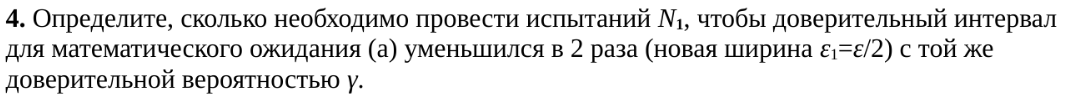
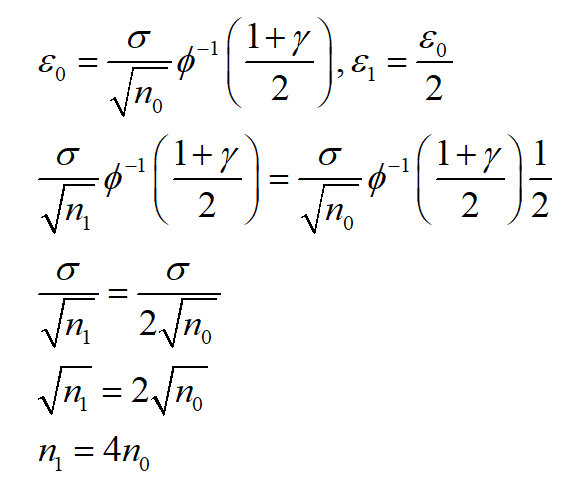
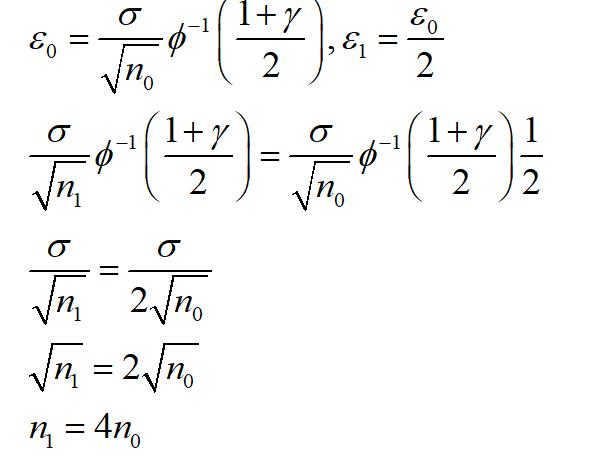

In [17]:
# -----------------------------------------------------------------
# ЧАСТЬ: ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ ДЛЯ МАТЕМАТИЧЕСКОГО ОЖИДАНИЯ 
#        ПРИ ИЗВЕСТНОЙ ДИСПЕРСИИ И БОЛЬШОМ ОБЪЕМЕ ВЫБОРКИ
# -----------------------------------------------------------------

# N1 = N * 4 = 400 - новый объем выборки (больше исходного)
N1 = 400

# Вычисление точности (полуширины) доверительного интервала
# Формула: ε = Z_{1-α/2} * (σ / √n)
# где:
# σ - известное стандартное отклонение генеральной совокупности
# n - объем выборки
# Z_{1-α/2} - квантиль стандартного нормального распределения
eps1 = (std / np.sqrt(N1)) * stats.norm.ppf((1 + g) / 2)

# Границы доверительного интервала
mean_a2 = norm_mean - eps1  # Нижняя граница
mean_b2 = norm_mean + eps1  # Верхняя граница

# Вывод точности (полуширины интервала)
print(eps1)
print(f"a) {mean_a2} < M < {mean_b2}")

0.0108504518879228
a) 1.003833963147688 < M < 1.0255348669235338


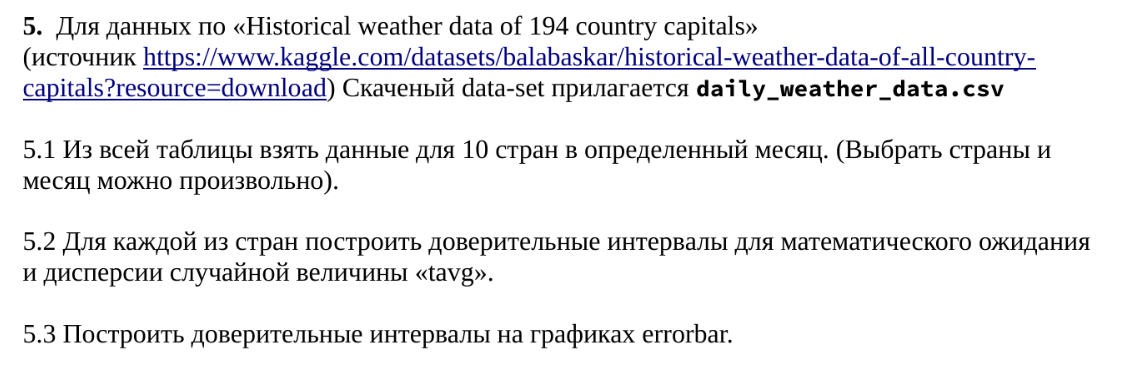

,date,country,city,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres,month
27778,2018-04-01,Belarus,Minsk,53.904540,27.561524,4.2,3.0,6.0,86.0,21.6,999.1,4
27779,2018-04-02,Belarus,Minsk,53.904540,27.561524,2.9,2.0,3.6,NaN,15.2,992.2,4
27780,2018-04-03,Belarus,Minsk,53.904540,27.561524,5.3,0.0,10.1,223.0,14.1,NaN,4
27781,2018-04-04,Belarus,Minsk,53.904540,27.561524,14.1,4.5,19.2,NaN,7.5,1012.4,4
27782,2018-04-05,Belarus,Minsk,53.904540,27.561524,13.9,9.0,19.3,NaN,9.6,1008.8,4
...,...,...,...,...,...,...,...,...,...,...,...,...
300250,2022-04-26,Turkmenistan,Ashgabat,37.960077,58.326063,22.5,16.8,25.8,76.0,9.1,1013.0,4
300251,2022-04-27,Turkmenistan,Ashgabat,37.960077,58.326063,22.7,17.8,27.6,209.0,11.5,1012.6,4
300252,2022-04-28,Turkmenistan,Ashgabat,37.960077,58.326063,24.0,17.8,29.8,262.0,11.5,1011.1,4
300253,2022-04-29,Turkmenistan,Ashgabat,37.960077,58.326063,26.9,20.2,32.8,203.0,9.1,1013.7,4


,n,mean,variance,mean_lower,mean_upper,var_lower,var_upper
country,,,,,,,
Belarus,150.0,8.164000,17.972118,7.480019,8.847981,14.499376,22.868418
Finland,150.0,4.796667,8.914016,4.314962,5.278371,7.191565,11.342538
Greece,150.0,16.512000,7.805627,16.061237,16.962763,6.297350,9.932181
Kazakhstan,150.0,8.734000,31.588836,7.827201,9.640799,25.484943,40.194856
Kyrgyzstan,150.0,13.322695,18.742624,12.624206,14.021184,15.120998,23.848839
Poland,150.0,9.970000,20.408960,9.241122,10.698878,16.465348,25.969149
Russia,150.0,7.290604,16.146127,6.642300,7.938908,13.026220,20.544957
Serbia,150.0,14.102667,21.335698,13.357424,14.847909,17.213013,27.148366
Sweden,150.0,5.528000,11.389815,4.983494,6.072506,9.188967,14.492841


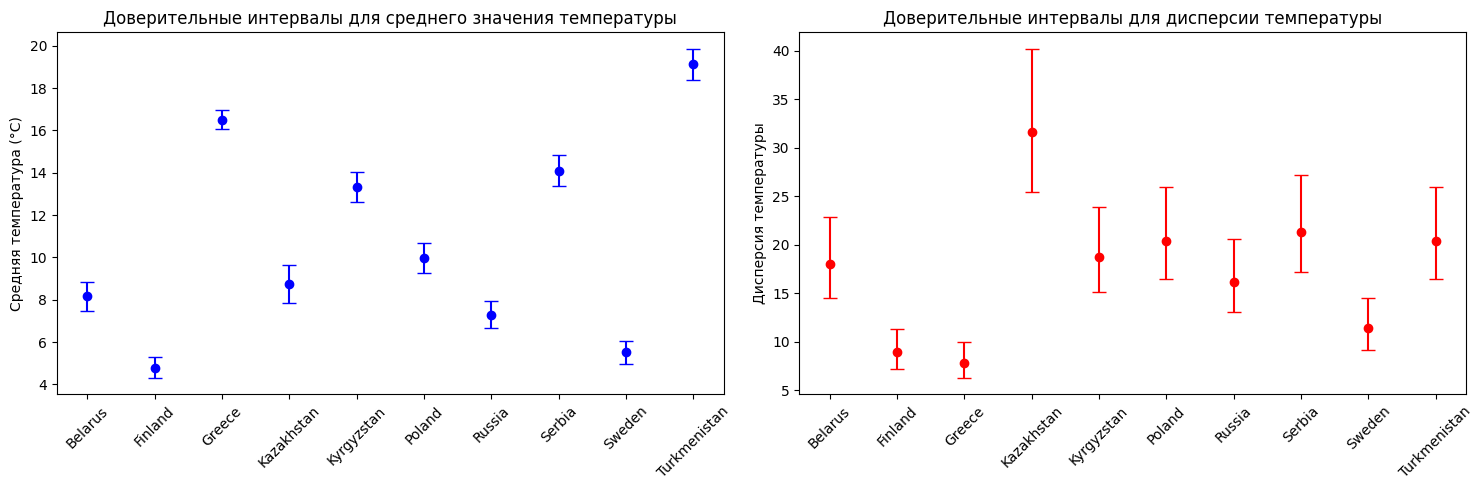

In [18]:
# Загрузка данных о погоде
df = pd.read_csv("daily_weather_data.csv")

# Преобразование даты и выделение месяца
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df['month'] = df['date'].dt.month

# Выбор 10 стран и марта (3-й месяц)
countries = ['Serbia', 'Kyrgyzstan', 'Turkmenistan', 'Russia', 'Poland', 
             'Greece', 'Belarus', 'Finland', 'Sweden', 'Kazakhstan']
month = 4

# Фильтрация данных: только выбранные страны и месяц
df = df[(df['country'].isin(countries)) & (df['month'] == month)]

display(df)  # Показываем отфильтрованные данные

# Доверительная вероятность (95%)
g = 0.95

def calculate_intervals(group):
    """
    Вычисляет доверительные интервалы для средней температуры (tavg)
    для одной страны.
    
    group: Series с температурами для одной страны
    Возвращает: статистики и границы интервалов
    """
    n = len(group)  # Количество наблюдений
    
    # Точечные оценки параметров
    mean_tavg = group.mean()   # Выборочное среднее
    var_tavg = group.var()     # Выборочная дисперсия
    std_tavg = group.std()     # Выборочное стандартное отклонение
    
    # 1. Доверительный интервал для математического ожидания (среднего)
    # Используем t-распределение (дисперсия неизвестна)
    # Формула: X̄ ± t_{1-α/2, n-1} * s/√n
    beta_t = stats.t.ppf((1 + g) / 2, n - 1)  # Квантиль t-распределения
    mean_lower = mean_tavg - beta_t * std_tavg / np.sqrt(n)
    mean_upper = mean_tavg + beta_t * std_tavg / np.sqrt(n)
    
    # 2. Доверительный интервал для дисперсии
    # Используем распределение хи-квадрат
    # Формула: [(n-1)s²/χ²_{1-α/2}, (n-1)s²/χ²_{α/2}]
    a_chi2 = stats.chi2.ppf((1 - g) / 2, n - 1)  # Нижний квантиль хи-квадрат
    b_chi2 = stats.chi2.ppf((1 + g) / 2, n - 1)  # Верхний квантиль хи-квадрат
    var_lower = (n - 1) * var_tavg / b_chi2
    var_upper = (n - 1) * var_tavg / a_chi2
    
    # Возвращаем все вычисленные значения
    return pd.Series({
        'n': n,                    # Размер выборки
        'mean': mean_tavg,         # Точечная оценка среднего
        'variance': var_tavg,      # Точечная оценка дисперсии
        'mean_lower': mean_lower,  # Нижняя граница CI для среднего
        'mean_upper': mean_upper,  # Верхняя граница CI для среднего
        'var_lower': var_lower,    # Нижняя граница CI для дисперсии
        'var_upper': var_upper     # Верхняя граница CI для дисперсии
    })

# Применяем функцию к каждой стране
result_df = df.groupby('country')['tavg'].apply(calculate_intervals).unstack()
display(result_df)  # Показываем результаты

# Визуализация доверительных интервалов
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 1. График для средних температур
means = result_df['mean']
# Вычисляем ошибки для errorbar: [нижние, верхние]
mean_ci_errors = [means - result_df['mean_lower'], result_df['mean_upper'] - means]

ax1.errorbar(result_df.index, means, yerr=mean_ci_errors, fmt='o', capsize=5, color='blue')
ax1.set_title('Доверительные интервалы для среднего значения температуры')
ax1.set_ylabel('Средняя температура (°C)')
ax1.tick_params(axis='x', rotation=45)

# 2. График для дисперсий
variances = result_df['variance']
var_ci_errors = [variances - result_df['var_lower'], result_df['var_upper'] - variances]

ax2.errorbar(result_df.index, variances, yerr=var_ci_errors, fmt='o', capsize=5, color='red')
ax2.set_title('Доверительные интервалы для дисперсии температуры')
ax2.set_ylabel('Дисперсия температуры')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()